## Deteccion de Fraude: Proyecto Final EML

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Cargar datos
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### EDA

In [19]:
# Información básica
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

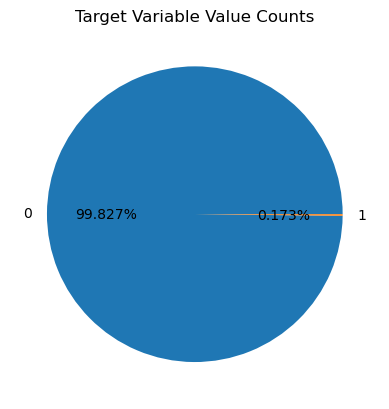

In [20]:
# get the set of distinct classes
labels = df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

Clases altamente desbalanceadas

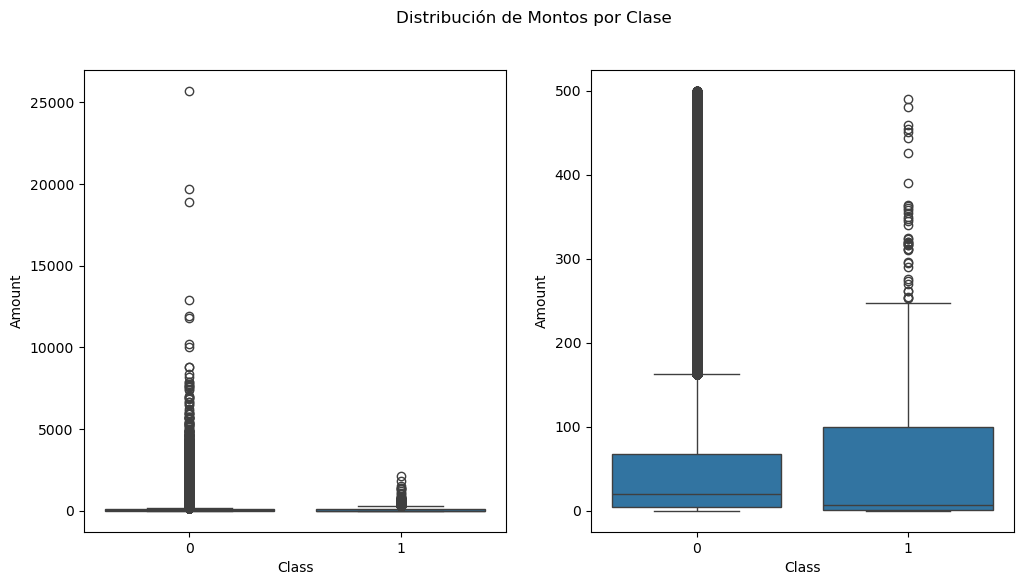

In [21]:
# Distribución de montos
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x='Class', y='Amount', data=df)
plt.subplot(122)
sns.boxplot(x='Class', y='Amount', data=df[df['Amount'] < 500])
plt.suptitle('Distribución de Montos por Clase')
plt.show()

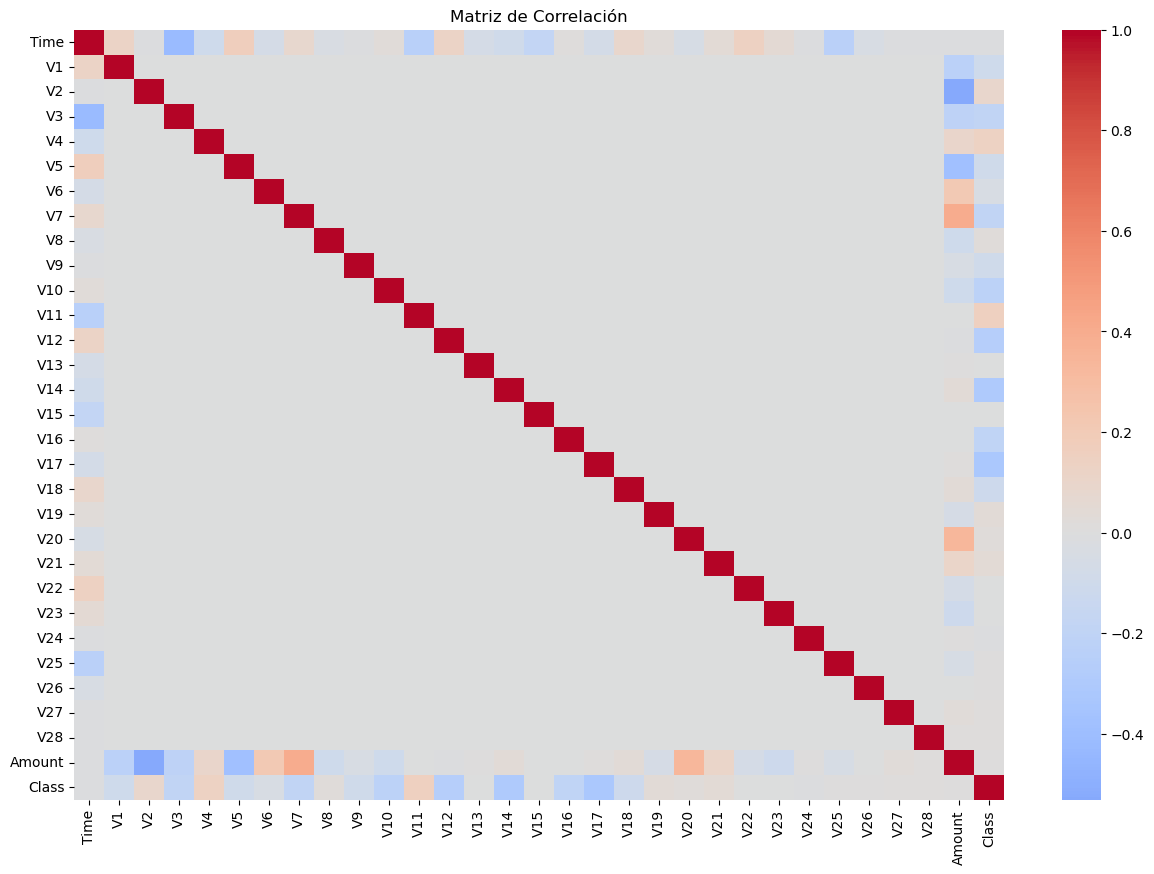

In [22]:
# Matriz de correlación
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

V7, V12, V14, V17 tienen correlación negativa con Class.

V2, V4, V11 tienen correlación positiva con Class.

Time y Amount tienen baja correlación con Class.

<Axes: >

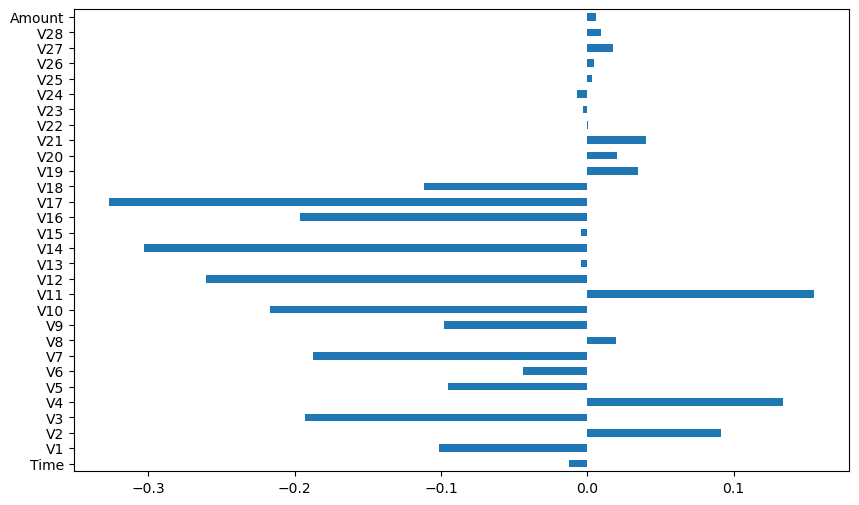

In [23]:
correlation_values = df.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

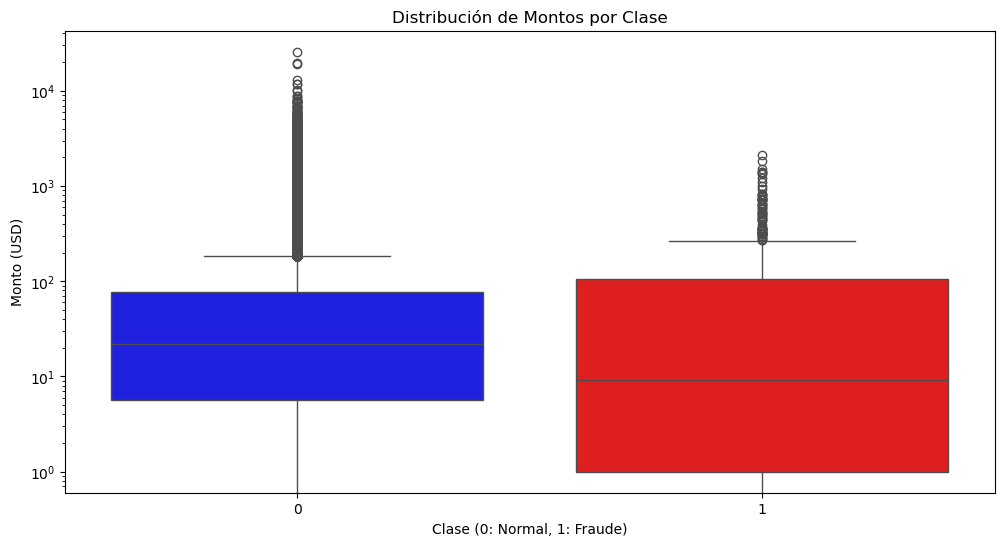

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'red'])
plt.title('Distribución de Montos por Clase')
plt.xlabel('Clase (0: Normal, 1: Fraude)')
plt.ylabel('Monto (USD)')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

📌 Hallazgos:

Transacciones normales tienen una distribución más amplia, con algunos valores extremos altos.

Transacciones fraudulentas tienden a ser de montos más bajos (mediana ~ 9vs. 22 en normales).

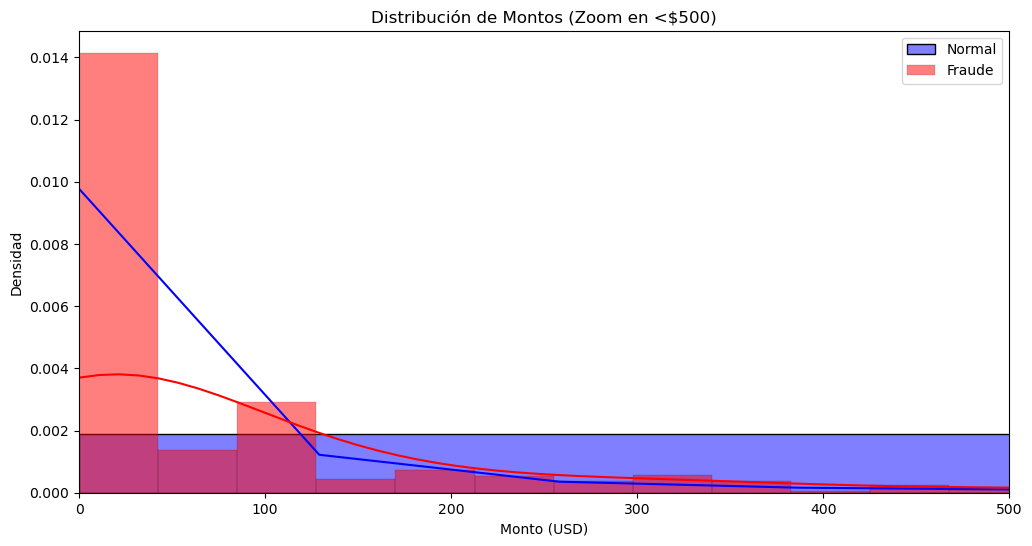

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Normal', kde=True, stat='density')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraude', kde=True, stat='density')
plt.xlim(0, 500)  # Limitamos a montos menores a $500 para mejor visualización
plt.title('Distribución de Montos (Zoom en <$500)')
plt.xlabel('Monto (USD)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

📌 Observación:

La mayoría de fraudes ocurren en montos menores a $100.

Hay algunos outliers extremos (ej. $2,125.87).

Distribución altamente asimétrica (cola derecha).

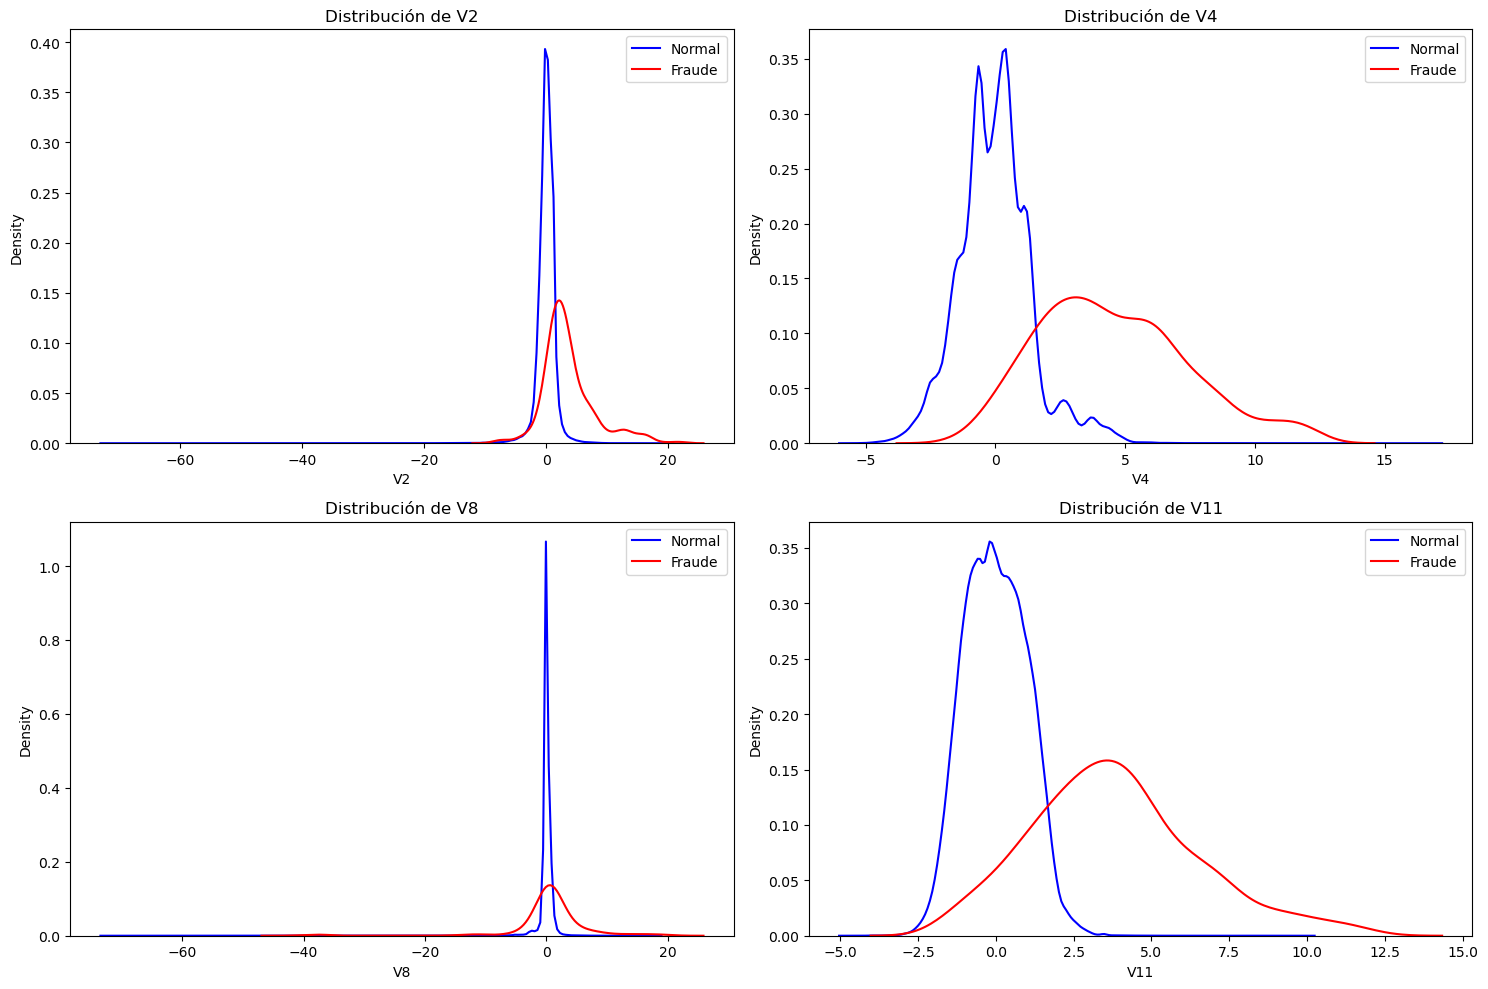

In [26]:
import numpy as np

# Seleccionamos algunas variables PCA para visualizar
pca_features = ['V2', 'V4', 'V8', 'V11']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(pca_features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', color='blue')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraude', color='red')
    plt.title(f'Distribución de {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

In [27]:
fraud_df = df[df['Class'] == 1]
print(f"Total de fraudes: {len(fraud_df)}")
print(fraud_df[['Time', 'Amount']].describe())

Total de fraudes: 492
                Time       Amount
count     492.000000   492.000000
mean    80746.806911   122.211321
std     47835.365138   256.683288
min       406.000000     0.000000
25%     41241.500000     1.000000
50%     75568.500000     9.250000
75%    128483.000000   105.890000
max    170348.000000  2125.870000


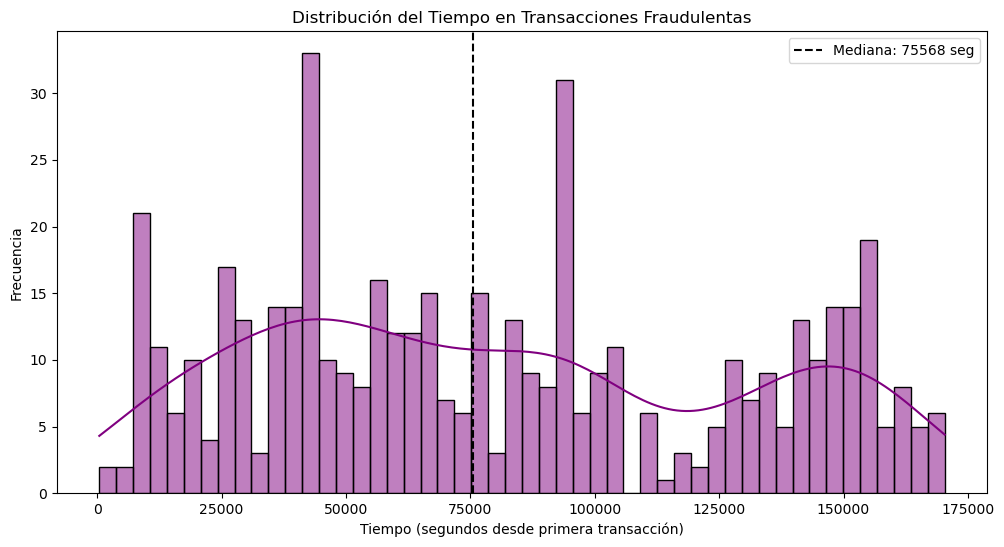

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(fraud_df['Time'], bins=50, color='purple', kde=True)
plt.title('Distribución del Tiempo en Transacciones Fraudulentas')
plt.xlabel('Tiempo (segundos desde primera transacción)')
plt.ylabel('Frecuencia')
plt.axvline(fraud_df['Time'].median(), color='black', linestyle='--', label=f'Mediana: {fraud_df["Time"].median():.0f} seg')
plt.legend()
plt.show()

📌 Patrones temporales:

Pico inicial: Muchos fraudes ocurren en las primeras ~40,000 segundos (~11 horas).

Segundo pico: Alrededor de ~120,000 segundos (~33 horas).

No hay fraudes después de ~170,000 segundos (~47 horas).

In [29]:
top_frauds = fraud_df.nlargest(5, 'Amount')[['Time', 'Amount']]
print("Top 5 fraudes por monto:")
print(top_frauds)

Top 5 fraudes por monto:
            Time   Amount
176049  122608.0  2125.87
6971      9064.0  1809.68
249167  154278.0  1504.93
89190    62467.0  1402.16
81609    59011.0  1389.56


In [30]:
# Comparación de medias (fraude vs. normal)
mean_comparison = pd.DataFrame({
    'Normal': df[df['Class'] == 0][pca_features].mean(),
    'Fraude': df[df['Class'] == 1][pca_features].mean()
})

print(mean_comparison)

       Normal    Fraude
V2  -0.006271  3.623778
V4  -0.007860  4.542029
V8  -0.000987  0.570636
V11 -0.006576  3.800173


#### Conclusiones del EDA


Desbalance extremo: Solo 0.17% de las transacciones son fraudulentas.

Montos bajos en fraudes: La mayoría de fraudes son en montos < $100. (mediana=9.25). El 25% de fraudes son ≤ $1.00 (¿microfraudes?).

El fraude más grande fue de $2,125.87.

Tiempo: Ocurren en "oleadas" (picos a las ~11 y ~33 horas).

Componentes PCA clave: V4, V11, V14 son los más correlacionados con fraudes.

Correlaciones débiles: Amount y Time no son muy útiles para predecir fraudes.

Alertar si: V4 > 2 y V11 > 2.

### Data Processing

In [31]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Escalar Time y Amount
scaler = RobustScaler()
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Eliminar originales
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Separar en X e y
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir en train y test (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Manejo de desbalance (SMOTE)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


Evaluación de Regresión Logística
              precision    recall  f1-score   support

   No Fraude       1.00      0.97      0.99     56864
      Fraude       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



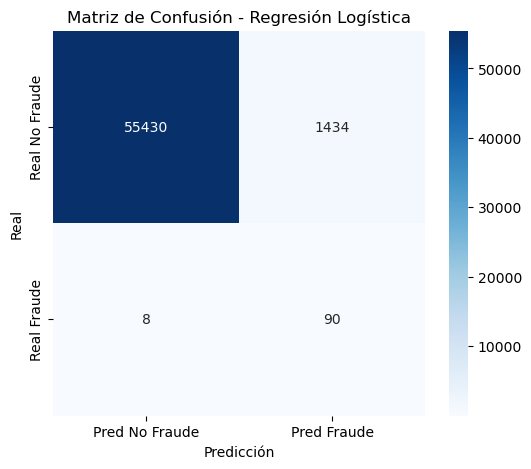


Evaluación de Random Forest
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     56864
      Fraude       0.88      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



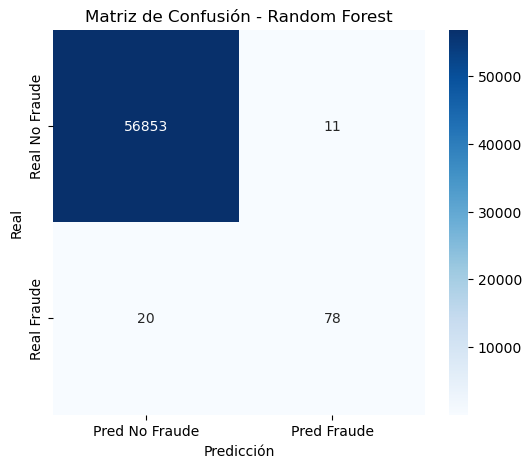


Evaluación de XGBoost
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     56864
      Fraude       0.72      0.86      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



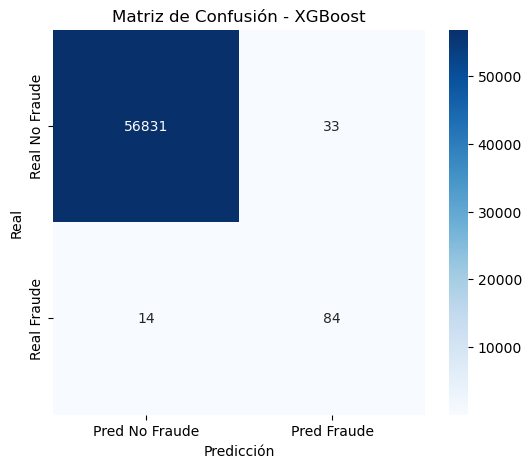



RESUMEN COMPARATIVO DE MODELOS
                     Precision    Recall  F1-Score     AUPRC
Modelo                                                      
Regresión Logística   0.059055  0.918367  0.110974  0.768883
XGBoost               0.717949  0.857143  0.781395  0.867180
Random Forest         0.876404  0.795918  0.834225  0.874881


<Figure size 1000x600 with 0 Axes>

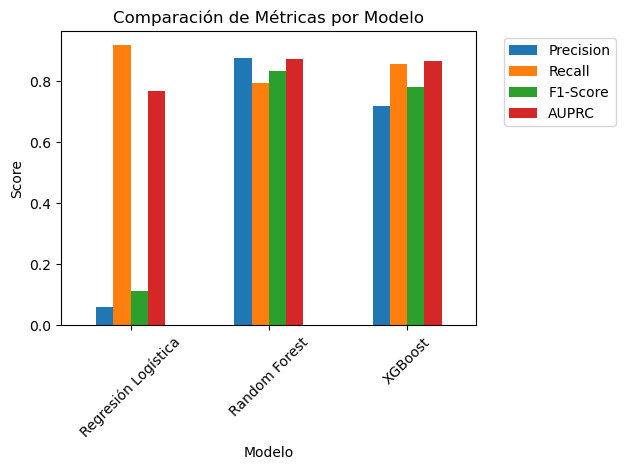

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Función mejorada de evaluación
def evaluate_model(model, model_name, X_test, y_test):
    # Predicciones
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Reporte de clasificación
    print(f"\n{'='*50}\nEvaluación de {model_name}\n{'='*50}")
    print(classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude']))
    
    # Matriz de confusión con etiquetas
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred No Fraude', 'Pred Fraude'],
                yticklabels=['Real No Fraude', 'Real Fraude'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()
    
    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auprc = auc(recall, precision)
    
    
    return {
        'Modelo': model_name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUPRC': auprc
    }

# Entrenamiento y evaluación de modelos
results = []

# 1. Regresión Logística
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_res, y_res)
results.append(evaluate_model(lr, "Regresión Logística", X_test, y_test))

# 2. Random Forest
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
rf.fit(X_res, y_res)
results.append(evaluate_model(rf, "Random Forest", X_test, y_test))

# 3. XGBoost
xgb = XGBClassifier(scale_pos_weight=(len(y_res)-sum(y_res))/sum(y_res), 
                    random_state=42)
xgb.fit(X_res, y_res)
results.append(evaluate_model(xgb, "XGBoost", X_test, y_test))


# Resumen comparativo
print("\n\nRESUMEN COMPARATIVO DE MODELOS")
print("="*50)
results_df = pd.DataFrame(results)
print(results_df.set_index('Modelo').sort_values('Recall', ascending=False))

# Gráfico comparativo
plt.figure(figsize=(10, 6))
results_df.set_index('Modelo').plot(kind='bar', rot=45)
plt.title('Comparación de Métricas por Modelo')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()